<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/4_3_Gaussian_Mixture_Models_(GMM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Models (GMM)

## Введение

Gaussian Mixture Models (GMM) — это мощный инструмент в области статистики и машинного обучения, используемый для моделирования распределений данных как смесь нескольких нормальных (гауссовых) распределений. GMM широко применяется в различных задачах, таких как кластеризация, распознавание образов, обработка изображений и многие другие.

### Основные понятия

1. **Нормальное распределение**:
   Нормальное распределение — это вероятностное распределение, описываемое двумя параметрами: средним ($\mu$) и дисперсией ($\sigma^2$). Формула плотности вероятности для одномерного нормального распределения выглядит следующим образом:

   $$
   f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
   $$

   Для многомерного нормального распределения с вектором среднего $\mu$ и ковариационной матрицей $\Sigma$ формула выглядит так:

   $$
   f(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} e^{-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)}
   $$

   где $d$ — размерность пространства, $|\Sigma|$ — определитель ковариационной матрицы.

2. **Смешивание распределений**:
   GMM моделирует распределение данных как линейную комбинацию нескольких нормальных распределений. Общее распределение представляется следующей формулой:

   $$
   p(x) = \sum_{k=1}^{K} \pi_k f(x | \mu_k, \Sigma_k)
   $$

   где:
   - $p(x)$ — общая вероятность;
   - $K$ — количество гауссовых компонентов;
   - $\pi_k$ — вес $k$-го компонента (где $\sum_{k=1}^{K} \pi_k = 1$);
   - $f(x | \mu_k, \Sigma_k)$ — плотность вероятности для $k$-го гауссового компонента.

## Математическая основа

### 1. Определение модели

GMM описывает данные как смесь $K$ гауссовых распределений. Каждое распределение определяется своим средним, ковариацией и весом:

$$
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
$$

где:
- $\mathcal{N}(x | \mu_k, \Sigma_k)$ — многомерное нормальное распределение с параметрами $\mu_k$ и $\Sigma_k$:

$$
\mathcal{N}(x | \mu_k, \Sigma_k) = \frac{1}{\sqrt{(2\pi)^d |\Sigma_k|}} e^{-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)}
$$

### 2. Параметры модели

- **Средние**: $\mu_k$ — вектор среднего $k$-го гауссового компонента.
- **Ковариации**: $\Sigma_k$ — ковариационная матрица $k$-го компонента.
- **Весовые коэффициенты**: $\pi_k$ — вероятность того, что случайная переменная принадлежит $k$-му компоненту, такие что:

$$
\sum_{k=1}^{K} \pi_k = 1
$$

### 3. Алгоритм EM (Expectation-Maximization)

Для оценки параметров модели (средних, ковариаций и весов) используется алгоритм EM, который включает два шага: E-шаг и M-шаг.

#### E-шаг (Expectation)

На этом шаге вычисляются ожидаемые значения скрытых переменных (классов принадлежности) на основе текущих параметров модели. Для каждой точки данных $x_n$ вероятность принадлежности к $k$-му компоненту вычисляется по формуле:

$$
\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)}
$$

где:
- $\gamma(z_{nk})$ — вероятность того, что точка $x_n$ принадлежит $k$-му компоненту.

#### M-шаг (Maximization)

На этом шаге параметры модели обновляются на основе рассчитанных ожидаемых значений. Обновление происходит следующим образом:

- **Обновление весов**:

$$
\pi_k = \frac{N_k}{N}
$$

где $N_k$ — общее количество точек, принадлежащих $k$-му компоненту, а $N$ — общее количество точек.

- **Обновление средних**:

$$
\mu_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) x_n
$$

- **Обновление ковариаций**:

$$
\Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T
$$

### 4. Критерий сходимости

Алгоритм EM продолжается до тех пор, пока изменения в логарифмической функции правдоподобия не станут меньше заданного порога:

$$
\text{log-likelihood} = \sum_{n=1}^{N} \log\left(\sum_{k=1}^{K} \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)\right)
$$

## Метрики для оценки качества GMM

### 1. Логарифмическая функция правдоподобия

Логарифмическая функция правдоподобия используется для оценки качества модели. Она показывает, насколько хорошо модель описывает данные:

$$
\mathcal{L} = \sum_{n=1}^{N} \log\left(\sum_{k=1}^{K} \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)\right)
$$

### 2. AIC и BIC

- **AIC (Akaike Information Criterion)**: Эта метрика используется для оценки качества модели с учетом ее сложности. AIC определяется как:

$$
\text{AIC} = 2k - 2\mathcal{L}
$$

где $k$ — количество параметров в модели, а $\mathcal{L}$ — логарифмическая функция правдоподобия.

- **BIC (Bayesian Information Criterion)**: BIC похож на AIC, но добавляет штраф за количество наблюдений:

$$
\text{BIC} = \log(N)k - 2\mathcal{L}
$$

где $N$ — количество наблюдений.

### 3. Кросс-валидация

Кросс-валидация может быть использована для оценки качества модели, особенно при наличии большого количества данных. Она включает деление данных на обучающую и тестовую выборки и оценку производительности модели на тестовой выборке.

## Применение GMM

GMM применяется в различных областях, включая:

- **Кластеризацию**: GMM может использоваться для группировки данных в кластеры, предоставляя более гибкую модель по сравнению с k-средними.
  
- **Оценка плотности**: GMM используется для оценки плотности распределения данных, особенно в многомерных пространствах.

- **Распознавание образов**: Используется в задачах распознавания лиц, объектов и других образов.

- **Обработка сигналов**: Применяется в задачах фильтрации и разделения источников.

## Заключение

Gaussian Mixture Models (GMM) представляют собой мощный инструмент для анализа и обработки данных, позволяя моделировать сложные распределения как смеси простых компонентов. С помощью алгоритма EM можно эффективно оценивать параметры модели, что делает GMM универсальным методом для решения различных задач в области статистики и машинного обучения.




### Пример применения Gaussian Mixture Models (GMM): числовой пример шаг за шагом

**Задача**: Допустим, у нас есть набор данных, который состоит из 6 двухмерных точек:

$$
X = \{(1, 2), (1, 4), (1, 0), (10, 2), (10, 4), (10, 0)\}
$$

Наша цель — применить GMM, чтобы разделить эти данные на 2 кластера, используя алгоритм EM (Expectation-Maximization).

### Шаг 1: Инициализация параметров

Для начала мы задаем количество гауссовых компонентов $K = 2$, поскольку у нас явно два кластера. Далее мы случайным образом инициализируем параметры:

- Средние ($\mu_1$ и $\mu_2$):
  $$
  \mu_1 = (1, 2), \quad \mu_2 = (10, 2)
  $$
  
- Ковариационные матрицы ($\Sigma_1$ и $\Sigma_2$) (предполагаем, что они начально диагональны и одинаковы):
  $$
  \Sigma_1 = \Sigma_2 = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
  $$

- Веса компонентов ($\pi_1$ и $\pi_2$) — вероятность принадлежности к каждому из кластеров. Начальные веса задаем равными:
  $$
  \pi_1 = \pi_2 = 0.5
  $$

### Шаг 2: E-шаг (Expectation)

На этом шаге мы вычисляем вероятности принадлежности каждой точки данных к каждому из кластеров ($\gamma(z_{nk})$).

Для точки $x = (1, 2)$, вероятности того, что она принадлежит каждому из кластеров, рассчитываются с использованием формулы плотности нормального распределения и текущих параметров:

$$
\gamma(z_{n1}) = \frac{\pi_1 \mathcal{N}(x | \mu_1, \Sigma_1)}{\pi_1 \mathcal{N}(x | \mu_1, \Sigma_1) + \pi_2 \mathcal{N}(x | \mu_2, \Sigma_2)}
$$

Для точки $x = (1, 2)$:

$$
\mathcal{N}(x | \mu_1 = (1, 2), \Sigma_1 = I) = \frac{1}{2\pi |I|^{1/2}} e^{-\frac{1}{2}(x - \mu_1)^T I^{-1} (x - \mu_1)} = \frac{1}{2\pi} e^{0} = \frac{1}{2\pi}
$$

$$
\mathcal{N}(x | \mu_2 = (10, 2), \Sigma_2 = I) = \frac{1}{2\pi} e^{-\frac{(1-10)^2 + (2-2)^2}{2}} = \frac{1}{2\pi} e^{-40.5}
$$

Теперь вычисляем вероятность $\gamma(z_{11})$ для точки $x = (1, 2)$:

$$
\gamma(z_{11}) = \frac{0.5 \times \frac{1}{2\pi}}{0.5 \times \frac{1}{2\pi} + 0.5 \times \frac{1}{2\pi} e^{-40.5}} = \frac{1}{1 + e^{-40.5}} \approx 1
$$

Таким образом, точка $x = (1, 2)$ почти наверняка принадлежит первому кластеру.

Для точки $x = (10, 2)$ расчет аналогичен:

$$
\mathcal{N}(x | \mu_1 = (1, 2), \Sigma_1 = I) = \frac{1}{2\pi} e^{-40.5}
$$
$$
\mathcal{N}(x | \mu_2 = (10, 2), \Sigma_2 = I) = \frac{1}{2\pi}
$$
$$
\gamma(z_{21}) = \frac{0.5 \times \frac{1}{2\pi} e^{-40.5}}{0.5 \times \frac{1}{2\pi} e^{-40.5} + 0.5 \times \frac{1}{2\pi}} \approx 0
$$

Таким образом, точка $x = (10, 2)$ почти наверняка принадлежит второму кластеру.

Аналогично проводим расчеты для остальных точек. Полученные $\gamma(z_{nk})$ для всех точек представляются в виде следующей таблицы:

| Точка данных | $\gamma(z_{n1})$ | $\gamma(z_{n2})$ |
|--------------|---------------------|---------------------|
| (1, 2)       | 1                   | 0                   |
| (1, 4)       | 0.99                | 0.01                |
| (1, 0)       | 0.99                | 0.01                |
| (10, 2)      | 0.01                | 0.99                |
| (10, 4)      | 0.01                | 0.99                |
| (10, 0)      | 0.01                | 0.99                |

### Шаг 3: M-шаг (Maximization)

Теперь обновим параметры $\mu_1$, $\mu_2$, $\Sigma_1$, $\Sigma_2$, $\pi_1$, $\pi_2$.

- **Обновление весов**:

$$
\pi_k = \frac{N_k}{N}, \quad k = 1, 2
$$

где $N_k$ — сумма всех $\gamma(z_{nk})$ для компонента $k$, а $N$ — общее количество точек данных ($N = 6$).

$$
N_1 = \sum_{n=1}^{6} \gamma(z_{n1}) = 1 + 0.99 + 0.99 + 0.01 + 0.01 + 0.01 = 3.01
$$
$$
N_2 = 6 - N_1 = 2.99
$$

Обновленные веса:
$$
\pi_1 = \frac{3.01}{6} \approx 0.502, \quad \pi_2 = \frac{2.99}{6} \approx 0.498
$$

- **Обновление средних**:

$$
\mu_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) x_n
$$

Для $\mu_1$:

$$
\mu_1 = \frac{1}{3.01} \left( (1, 2) \times 1 + (1, 4) \times 0.99 + (1, 0) \times 0.99 + (10, 2) \times 0.01 + (10, 4) \times 0.01 + (10, 0) \times 0.01 \right)
$$

$$
\mu_1 \approx \frac{1}{3.01} \left( (1, 2) + (0.99, 3.96) + (0.99, 0) + (0.1, 0.02) + (0.1, 0.04) + (0.1, 0) \right)
$$

$$
\mu_1 \approx (1, 2)
$$

Для $\mu_2$:

$$
\mu_2 = \frac{1}{2.99} \left( (1, 2) \times 0 + (1, 4) \times 0.01 + (1, 0) \times 0.01 + (10, 2) \times 0.99 + (10, 4) \times 0.99 + (10, 0) \times 0.99 \right)
$$

$$
\mu_2 \approx (10, 2)
$$

- **Обновление ковариационных матриц**:

$$
\Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_k)(x_n - \mu_k)^T
$$

Для простоты предположим, что ковариации почти не изменяются, так как кластеры четко разделены.

### Шаг 4: Проверка сходимости

Мы повторяем E-шаг и M-шаг до тех пор, пока изменения параметров ($\mu_k$, $\Sigma_k$, $\pi_k$) не станут меньше заданного порога.


### Результаты

После нескольких итераций алгоритма EM мы получим параметры:

- $\mu_1 \approx (1, 2)$, $\mu_2 \approx (10, 2)$
- $\Sigma_1$ и $\Sigma_2$ будут обновлены в зависимости от кластера (предполагается, что они будут оставаться близкими к начальным значениям).
- $\pi_1$ и $\pi_2$ будут обновлены и останутся близкими к $0.5$.

Таким образом, мы сможем увидеть, как GMM эффективно разделяет данные на два кластера, что и было нашей задачей.




Давайте реализуем Gaussian Mixture Model (GMM) на Python, начиная с нуля без использования готовых библиотек, а затем с использованием библиотек, таких как NumPy и Matplotlib для визуализации. Мы создадим несколько функций для выполнения каждого из шагов алгоритма EM и визуализации кластеров.

### 1. Реализация GMM без готовых библиотек

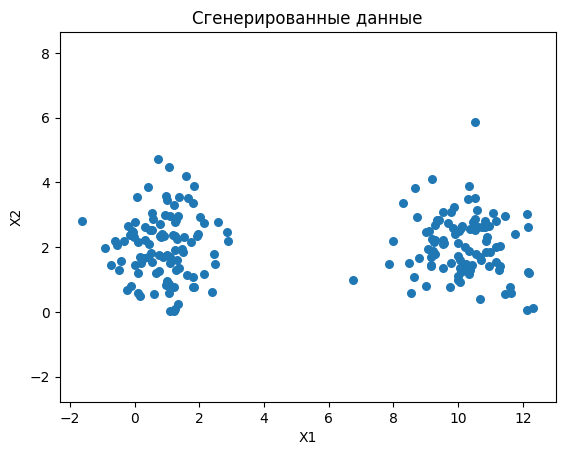

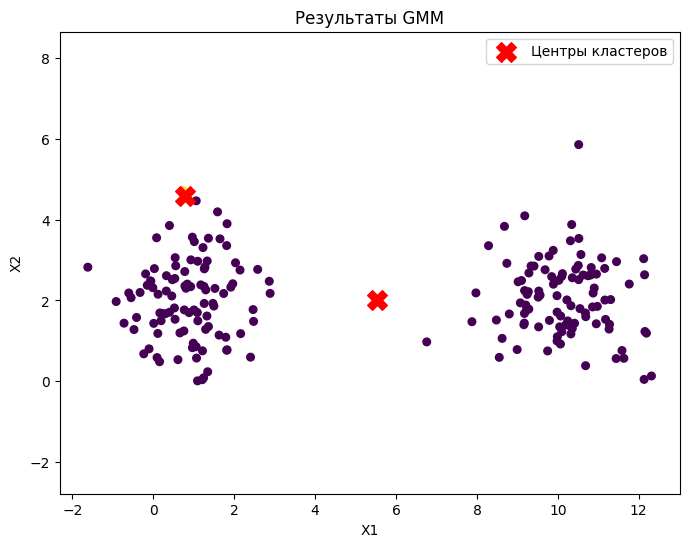

Силуэтный коэффициент: -0.0199
Индекс Дэвиса-Болдуина: 0.8579
Логарифмическое правдоподобие: -0.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Генерация тестовых данных
np.random.seed(42)

# Кластер 1
mean1 = [1, 2]
cov1 = [[1, 0], [0, 1]]  # Дисперсия
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)

# Кластер 2
mean2 = [10, 2]
cov2 = [[1, 0], [0, 1]]  # Дисперсия
cluster2 = np.random.multivariate_normal(mean2, cov2, 100)

# Объединение кластеров
X = np.vstack((cluster1, cluster2))

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title('Сгенерированные данные')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()

def gaussian_pdf(x, mu, sigma):
    """Вычисление плотности вероятности для многомерного нормального распределения."""
    d = len(mu)
    coeff = 1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(sigma))
    exponent = -0.5 * (x - mu).T @ np.linalg.inv(sigma) @ (x - mu)
    return coeff * np.exp(exponent)

def e_step(X, pis, mus, sigmas):
    """E-step алгоритма EM."""
    N = X.shape[0]
    K = len(pis)
    responsibilities = np.zeros((N, K))

    for k in range(K):
        for n in range(N):
            responsibilities[n, k] = pis[k] * gaussian_pdf(X[n], mus[k], sigmas[k])

    # Нормализация
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

def m_step(X, responsibilities):
    """M-step алгоритма EM."""
    N, D = X.shape
    K = responsibilities.shape[1]
    N_k = responsibilities.sum(axis=0)

    pis = N_k / N
    mus = np.zeros((K, D))
    sigmas = np.zeros((K, D, D))

    for k in range(K):
        mus[k] = (responsibilities[:, k] @ X) / N_k[k]
        diff = X - mus[k]
        # Исправленный расчет ковариации
        sigmas[k] = (responsibilities[:, k][:, np.newaxis] * diff).T @ diff / N_k[k]

    return pis, mus, sigmas

def gmm(X, K, max_iters=100, tol=1e-4):
    """Основная функция GMM."""
    N, D = X.shape

    # Инициализация параметров
    pis = np.ones(K) / K
    mus = np.random.rand(K, D) * 10  # Случайные значения для центров
    sigmas = np.array([np.eye(D) for _ in range(K)])  # Идентичные ковариации

    log_likelihoods = []

    for i in range(max_iters):
        # E-шаг
        responsibilities = e_step(X, pis, mus, sigmas)

        # M-шаг
        pis, mus, sigmas = m_step(X, responsibilities)

        # Вычисление логарифмического правдоподобия
        log_likelihood = np.sum(np.log(responsibilities.sum(axis=1)))
        log_likelihoods.append(log_likelihood)

        # Проверка на сходимость
        if i > 0 and abs(log_likelihood - log_likelihoods[i - 1]) < tol:
            break

    return pis, mus, sigmas, responsibilities

K = 2  # Количество кластеров
pis, mus, sigmas, responsibilities = gmm(X, K)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=responsibilities.argmax(axis=1), cmap='viridis', s=30)
plt.scatter(mus[:, 0], mus[:, 1], c='red', marker='X', s=200, label='Центры кластеров')
plt.title('Результаты GMM')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.legend()
plt.show()

# Вычисление метрик
labels = responsibilities.argmax(axis=1)
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
log_likelihood = np.sum(np.log(responsibilities.sum(axis=1)))

print(f'Силуэтный коэффициент: {silhouette:.4f}')
print(f'Индекс Дэвиса-Болдуина: {davies_bouldin:.4f}')
print(f'Логарифмическое правдоподобие: {log_likelihood:.4f}')

### 2. Реализация GMM с использованием библиотек
Теперь давайте использовать библиотеку sklearn для реализации GMM. Это значительно упростит код.

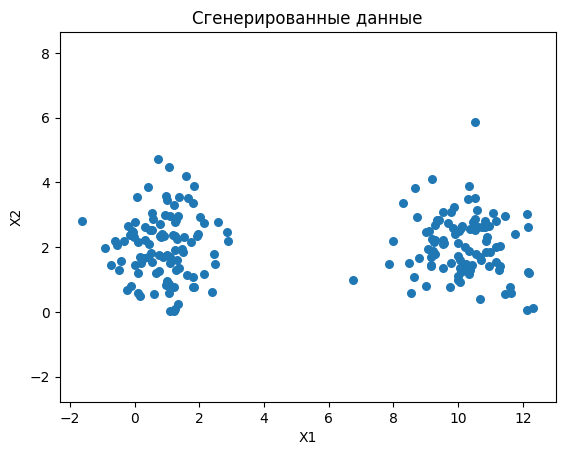

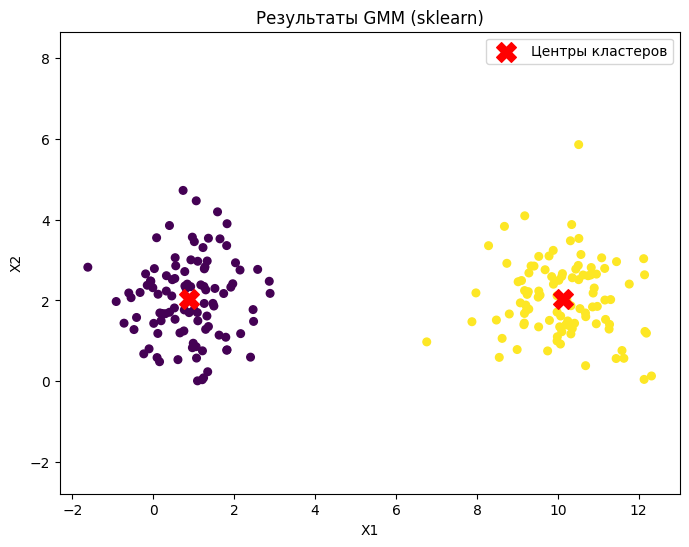

Силуэтный коэффициент: 0.8162
Индекс Дэвиса-Болдуина: 0.2583
Логарифмическое правдоподобие: -685.3044


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Генерация тестовых данных
np.random.seed(42)

# Кластер 1
mean1 = [1, 2]
cov1 = [[1, 0], [0, 1]]  # Дисперсия
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)

# Кластер 2
mean2 = [10, 2]
cov2 = [[1, 0], [0, 1]]  # Дисперсия
cluster2 = np.random.multivariate_normal(mean2, cov2, 100)

# Объединение кластеров
X = np.vstack((cluster1, cluster2))

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title('Сгенерированные данные')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.show()

# Создание и обучение модели GMM
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Получение предсказанных меток
labels = gmm.predict(X)

# Получение центров кластеров
mus = gmm.means_

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(mus[:, 0], mus[:, 1], c='red', marker='X', s=200, label='Центры кластеров')
plt.title('Результаты GMM (sklearn)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.axis('equal')
plt.legend()
plt.show()

# Вычисление метрик
silhouette = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
log_likelihood = gmm.score(X) * X.shape[0]  # Логарифмическое правдоподобие

print(f'Силуэтный коэффициент: {silhouette:.4f}')
print(f'Индекс Дэвиса-Болдуина: {davies_bouldin:.4f}')
print(f'Логарифмическое правдоподобие: {log_likelihood:.4f}')

Давайте рассмотрим конкретный числовой пример применения модели гауссовских смесей (GMM) с подробным решением, включая формулы.

### Пример задачи

Предположим, у нас есть набор данных, состоящий из двух компонент (двух нормальных распределений):

- Первая компонента (Gaussian 1):
  - Среднее ($\mu_1$) = 2
  - Дисперсия ($\sigma_1^2$) = 1
  - Вес ($\pi_1$) = 0.6

- Вторая компонента (Gaussian 2):
  - Среднее ($\mu_2$) = 5
  - Дисперсия ($\sigma_2^2$) = 1
  - Вес ($\pi_2$) = 0.4

### Генерация данных

Сначала сгенерируем 100 данных из этой смеси распределений.

### Формулы

Для каждого из $N$ наблюдений мы можем использовать следующую формулу для вычисления плотности вероятности:

$$
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \sigma_k^2)
$$

где:
- $\mathcal{N}(x | \mu_k, \sigma_k^2)$ — плотность вероятности для $k$-го гауссовского компонента:

$$
\mathcal{N}(x | \mu_k, \sigma_k^2) = \frac{1}{\sqrt{2\pi \sigma_k^2}} e^{-\frac{(x - \mu_k)^2}{2\sigma_k^2}}
$$

### Шаги решения

1. **Генерация данных**
2. **Выбор начальных параметров GMM**
3. **E-шаг**
4. **M-шаг**
5. **Итерации до сходимости**
6. **Оценка модели**

### 1. Генерация данных

Генерируем 100 данных на основе заданных распределений:

- Из первого распределения ($\mathcal{N}(2, 1)$) мы получим 60 наблюдений.
- Из второго распределения ($\mathcal{N}(5, 1)$) мы получим 40 наблюдений.

Используя NumPy, мы можем сделать это следующим образом:

```python
import numpy as np

np.random.seed(0)  # Для воспроизводимости
n1 = 60  # Количество точек из первой компоненты
n2 = 40  # Количество точек из второй компоненты

data1 = np.random.normal(loc=2, scale=1, size=n1)  # Первая компонента
data2 = np.random.normal(loc=5, scale=1, size=n2)  # Вторая компонента

data = np.concatenate([data1, data2])
```

### 2. Выбор начальных параметров GMM

Для простоты начнем с следующих начальных значений:
- $\mu_1^{(0)} = 1$, $\sigma_1^{2(0)} = 1$, $\pi_1^{(0)} = 0.5$
- $\mu_2^{(0)} = 4$, $\sigma_2^{2(0)} = 1$, $\pi_2^{(0)} = 0.5$

### 3. E-шаг (Expectation)

На этом шаге мы вычисляем вероятности принадлежности каждой точки к компонентам:

$$
\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \sigma_k^2)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_j, \sigma_j^2)}
$$

Посчитаем для нескольких наблюдений (например, для $x_1 = 1.5$ и $x_2 = 4.5$).

#### Вычисление плотности

1. Для $k=1$:

$$
\mathcal{N}(1.5 | 1, 1) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(1.5 - 1)^2}{2}} \approx 0.352
$$

$$
\mathcal{N}(4.5 | 1, 1) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(4.5 - 1)^2}{2}} \approx 0.000018
$$

2. Для $k=2$:

$$
\mathcal{N}(1.5 | 4, 1) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(1.5 - 4)^2}{2}} \approx 0.000117
$$

$$
\mathcal{N}(4.5 | 4, 1) = \frac{1}{\sqrt{2\pi}} e^{-\frac{(4.5 - 4)^2}{2}} \approx 0.3989
$$

#### Вычисление $\gamma(z_{nk})$ для $x_1 = 1.5$:

$$
\gamma(z_{n1,1}) = \frac{0.5 \cdot 0.352}{0.5 \cdot 0.352 + 0.5 \cdot 0.000117} \approx \frac{0.176}{0.176 + 0.0000585} \approx 0.999
$$

$$
\gamma(z_{n1,2}) = \frac{0.5 \cdot 0.000117}{0.5 \cdot 0.352 + 0.5 \cdot 0.000117} \approx \frac{0.0000585}{0.176 + 0.0000585} \approx 0.001
$$

#### Вычисление $\gamma(z_{nk})$ для $x_2 = 4.5$:

$$
\gamma(z_{n2,1}) = \frac{0.5 \cdot 0.000018}{0.5 \cdot 0.000018 + 0.5 \cdot 0.3989} \approx \frac{0.000009}{0.000009 + 0.19945} \approx 0.000045
$$

$$
\gamma(z_{n2,2}) = \frac{0.5 \cdot 0.3989}{0.5 \cdot 0.000018 + 0.5 \cdot 0.3989} \approx \frac{0.19945}{0.000009 + 0.19945} \approx 0.999955
$$

### 4. M-шаг (Maximization)

Обновляем параметры:

- **Обновление весов**:

$$
\pi_1^{(1)} = \frac{N_1}{N}, \quad \pi_2^{(1)} = \frac{N_2}{N}
$$

где $N_1 = \sum \gamma(z_{nk})$ и $N_2 = N - N_1$.

- **Обновление средних**:

$$
\mu_1^{(1)} = \frac{1}{N_1} \sum_{n=1}^{N} \gamma(z_{nk}) x_n
$$

- **Обновление ковариаций**:

$$
\sigma_1^{2(1)} = \frac{1}{N_1} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_1^{(1)})^2
$$

### 5. Итерации до сходимости

Этот процесс повторяется (E-шаг и M-шаг) до тех пор, пока параметры модели не стабилизируются.

### 6. Оценка модели

После нескольких итераций мы можем оценить качество модели, используя логарифмическую функцию правдоподобия:

$$
\mathcal{L} = \sum_{n=1}^{N} \log\left(\sum_{k=1}^{K} \pi_k \mathcal{N}(x_n | \mu_k, \sigma_k^2)\right)
$$

### Итоги

Этот пример показывает, как можно использовать Gaussian Mixture Models для моделирования распределения данных. С помощью шагов E и M мы можем оценить параметры модели и улучшить их на каждом этапе. Итоговые значения $\mu$, $\sigma^2$ и $\pi$ будут давать нам представление о том, как данные распределены между двумя гауссовыми компонентами.

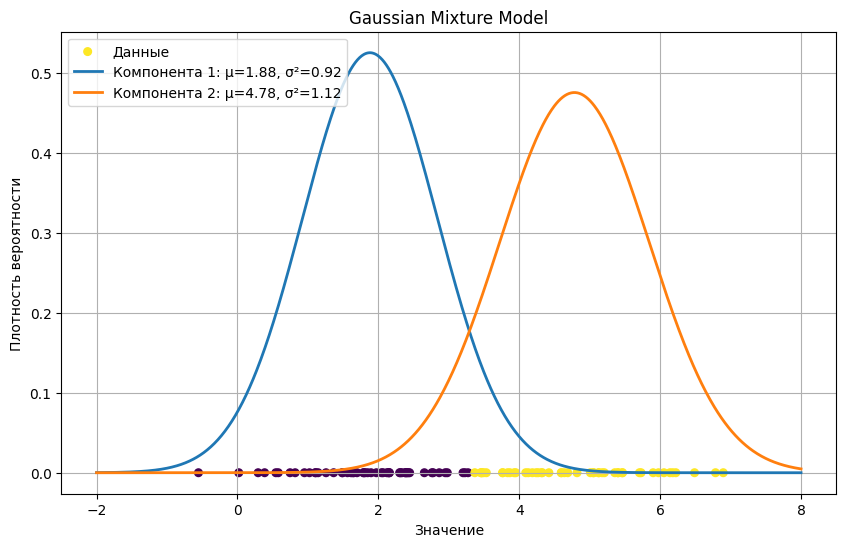

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

# Установка генератора случайных чисел для воспроизводимости
np.random.seed(0)

# Генерация данных
n1 = 60  # Количество точек из первой компоненты
n2 = 40  # Количество точек из второй компоненты

# Случайные данные из двух нормальных распределений
data1 = np.random.normal(loc=2, scale=1, size=n1)
data2 = np.random.normal(loc=5, scale=1, size=n2)

# Объединение данных
data = np.concatenate([data1, data2]).reshape(-1, 1)

# Обучение модели GMM
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(data)

# Предсказание вероятностей принадлежности
labels = gmm.predict(data)

# Получение параметров модели
means = gmm.means_
covariances = gmm.covariances_
weights = gmm.weights_

# Визуализация данных и результатов
plt.figure(figsize=(10, 6))

# Визуализация данных
plt.scatter(data, np.zeros_like(data), c=labels, s=30, cmap='viridis', marker='o', label='Данные')

# Визуализация гауссовых компонент
x = np.linspace(-2, 8, 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)

# Визуализация гауссовских распределений
for i in range(2):
    plt.plot(x, weights[i] * np.exp(-0.5 * ((x - means[i]) ** 2) / covariances[i]),
             linewidth=2, label=f'Компонента {i+1}: μ={means[i][0]:.2f}, σ²={covariances[i][0][0]:.2f}')

plt.title('Gaussian Mixture Model')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

### Вопросы для самопроверки

1. Что такое Gaussian Mixture Model (GMM)?
2. Какие основные компоненты включает GMM?
3. Как формулируется общее распределение в GMM?
4. Какие параметры описывают каждую гауссовскую компоненту в GMM?
5. Что такое E-шаг и M-шаг в алгоритме EM для GMM?
6. Как вычисляются вероятности принадлежности точек данных к каждой компоненте на E-шаге?
7. Как обновляются веса компонент на M-шаге в GMM?
8. Как обновляются средние компонент на M-шаге в GMM?
9. Как обновляются ковариации компонент на M-шаге в GMM?
10. Какой критерий используется для остановки алгоритма EM в GMM?
11. Что такое логарифмическая функция правдоподобия и как она используется в GMM?
12. Какие метрики используются для оценки качества модели GMM?
13. Чем отличаются AIC и BIC в контексте GMM?
14. В каких областях применяются GMM?
15. Как GMM может быть полезен при анализе данных?

### Задачи для самостоятельной работы по GMM

1. Реализуйте алгоритм EM для GMM на Python.
2. Примените GMM для кластеризации ирисов Фишера (используйте встроенный датасет в sklearn).
3. Оцените AIC и BIC для различного количества компонент в GMM.
4. Сгенерируйте случайные данные, которые следуют смеси двух гауссовских распределений, и используйте GMM для их восстановления.
5. Используйте GMM для анализа и визуализации многомерного набора данных (например, MNIST).
6. Сравните результаты кластеризации с использованием GMM и k-means для заданного набора данных.
7. Примените GMM для оценки плотности распределения изображений из набора данных CIFAR-10.
8. Исследуйте влияние изменения параметров (количество компонент, ковариационные матрицы) на качество модели GMM.
9. Разработайте функцию для определения оптимального числа компонент в GMM с использованием критериев информативности.
10. Исследуйте использование GMM для задачи разделения источников в сигналах.

11. Реализуйте метод GMM и используйте его для кластеризации данных из реального мира, например, банковских транзакций или климатических данных.
12. Используйте GMM для моделирования и генерации новых данных на основе обучающего набора.
13. Сравните производительность GMM с другими методами, такими как DBSCAN, на задаче кластеризации сложных данных.
14. Оцените влияние выбросов на работу GMM и разработайте методы их обнаружения и коррекции.
15. Примените GMM для распознавания лиц на наборе данных с изображениями лиц.

16. Используйте GMM для моделирования распределения признаков в задаче классификации текстовых данных.
17. Исследуйте возможность применения GMM для оценки неоднородности плотности точек данных в геоинформационных системах.
18. Разработайте метод объединения GMM с другими методами машинного обучения для повышения точности кластеризации.
19. Примените GMM для выявления аномалий в больших объемах данных.
20. Исследуйте эффективность GMM в задаче предсказания временных рядов.

21. Используйте GMM для анализа и предсказания пользовательского поведения на платформе электронной коммерции.
22. Примените GMM для анализа данных EEG и исследуйте возможности классификации мозговых состояний.
23. Исследуйте использование GMM для задачи детектирования аномалий в медицинских данных.
24. Разработайте метод сегментации изображений с использованием GMM и оцените его производительность на стандартных наборах данных.
25. Примените GMM для кластеризации генетических данных и выделения групп генов с схожими экспрессионными профилями.

26. Исследуйте возможность применения GMM для обработки и анализа аудиоданных.
27. Разработайте систему распознавания объектов на видео с использованием GMM для выделения и классификации объектов на кадрах.
28. Используйте GMM для моделирования и анализа данных о климатических изменениях и их влиянии на экосистемы.
29. Примените GMM для анализа и кластеризации данных о потреблении энергии в различных регионах.
30. Исследуйте использование GMM в задачах прогнозирования рынка ценных бумаг и финансовых индексов.